# Вычисление производных

Для вычисления производных используется библиотека sympy.
Импорт модуля:

In [6]:
from sympy import *

## Вычисление производной - функция diff(f,x,k).

Вычисляет производную $k$-го порядка функции $у = f(х)$ по переменной х.</br>
</br>
Параметры: </br>
&nbsp;&nbsp;&nbsp;&nbsp; f - функция;</br>
&nbsp;&nbsp;&nbsp;&nbsp; х - переменная, по которой берется производная,</br>
&nbsp;&nbsp;&nbsp;&nbsp; к - необязательный параметр, порядок производной.</br>

### Пример:

#### 1: Производная функции у = xcosx: $ y' = (x\cos x)' = \cos x - x\sin x $

In [30]:
''' Объявление символьной переменной '''
x = symbols('x')
            
''' Функция у(х) '''
y = x * cos(x)
            
''' Вычисление производной '''
diff(x * cos(x), x)

-x*sin(x) + cos(x)

#### 2: Производная 3-го порядка функции $y=\ln x$ </br>
&nbsp;&nbsp;&nbsp;&nbsp; $ (\ln x)^{(3)}=\frac{2}{x^{3}}.$

In [16]:
x = symbols('x')
y = x * cos(x)

diff(log(x), x, 3) # либо diff(log(x), x, x, x)

2/x**3

#### 3: Найти значение $y''(10)$ для функции $t = \lg^{3}(x^{3})$.

In [17]:
x = symbols('x')
y = log(x**3,10)**3

diff(y,x,2).subs(x,10)

-9*(-6 + log(1000))*log(1000)/(100*log(10)**3)

В некоторых случаях более простое выражение для ответа можно получить, применяя метод simplify ().

In [20]:
x = symbols('x')
y = log(x**3, 10)**3

diff(y,x,2).subs(x,10).simplify()

81*(2 - log(10))/(100*log(10)**2)

Замечание.</br>
> В Python наименование $\log$ означает натуральный логарифм (логарифм по основанию $е$).

#### 4: Решить уравнение $y'= 0$, где $y(x) = \frac{x^{2}+x-6}{x^{2}-10x+25}$

In [24]:
x = symbols('x')

''' Производная: '''
y = (x**2+x-6)/(x**2-10*x+25)
z = diff(y,x)
z

(10 - 2*x)*(x**2 + x - 6)/(x**2 - 10*x + 25)**2 + (2*x + 1)/(x**2 - 10*x + 25)

In [26]:
''' Решение уравнения '''
solve(z, x)

[7/11]

## Производная неявной функции

**Производная неявной функции** - функция idiff(eq, у, х, п=1).</br>
Вычисляет производную $n$-го порядка переменной $у$ по переменной $х$ в предположении, что эти переменные связаны уравнением
вида: eq = 0.</br>
</br>
Параметры: </br>
eq - уравнение, связывающее зависимую и независимую переменную, приведенное к виду с нулевой правой частью; </br>
у - зависимая переменная, функция, от которой требуется найти производную; </br>
х - независимая переменная, по которой берется производная;</br>
п - порядок производной (по умолчанию 1).

### Пример:

Наити первую производную $\frac{dy}{dx}$ и вторую производную для функции, заданной неявно в виде уравнения: $x^{2}+y^{2}=4$.

Решение. Имеем: $F(x, y)=x^{2}+y^{2}-4; y'=\frac{F'x}{F'y}=-\frac{2x}{2y}=-\frac{x}{y}$

In [43]:
x, y = symbols('x y')
f = x**2 + y**2 - 4
idiff(f, y, x)

-x/y

Вторая производная.

In [44]:
x, y = symbols('x y')
f = x**2 + y**2 - 4
idiff(f, y, x, 2)

(-x**2/y - y)/y**2

Ответ можно попытаться упростить. Для этого нужно использовать метод .simplify ()

In [46]:
idiff(f, y, x, 2).simplify()

-(x**2 + y**2)/y**3

## Производная функции, заданной в параметрической форме

Вычисляется с использованием функции diff().

### Пример:

Найти $y'_{x}$ и $y''_{xx}$ для функции, заданной в параметрической форме:</br></br>
$
\left\{\begin{matrix}
x = t - \sin t, \\
y = 1 - \cos t.
\end{matrix}\right.
$

Для решения используем формулы, выражающие производную функции по переменной $х$ через обычные производные по переменной $t$:</br></br>

<div style="text-align: center;"> <font size=5>$ y'_{x} = \frac{y'_{t}}{y'_{t}}=\frac{\sin t}{1-\cos t}; y''=\frac{(y'_{x})'_{t}}{x'_{t}}=\frac{1}{1-\cos t} $</font></div>

In [50]:
t = symbols('t')

x = t - sin(t)
y = 1 - cos(t)

In [ ]:
''' Первая производная '''
y_diff = diff(y,t)/diff(x,t)
y_diff

In [ ]:
''' Вторая производная '''
y_2diff = diff(y_diff, t)/diff(x, t)
y_2diff.simplify()

## Односторонняя производная

### Пример:

Найти левую и правую производные функции $f(x)$ в точке ее разрыва, если</br></br>
$
f(x) = 
\left\{\begin{matrix}
\mathrm{arctg}\left(\frac{1}{x}\right), & x \neq0 \\
-\frac{\pi}{2}, & x = 0. 
\end{matrix}\right.
$</br>
</br>
Решение. Точкой разрыва является значение $х = 0$. График функции:

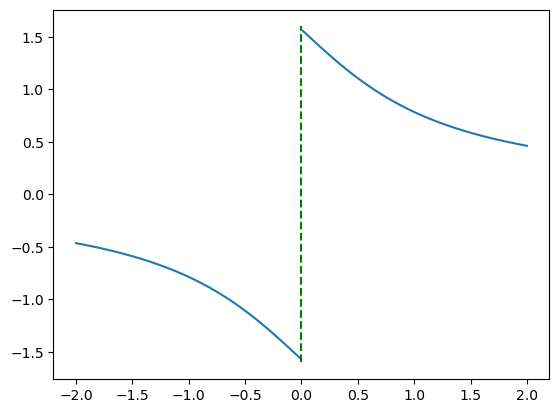

In [55]:
''' Построим график с учетом того, что функция не существует в точке x=0 '''
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.linspace(-2,2,500)

''' В узкий интервал около нуля записываем значения NaN '''
x[(x>-0.01) & (x < 0.01)] = np.nan
y = np.arctan(1/x)

plt.plot(x,y)
plt.vlines(0, -1.6, 1.6, color='g', linestyles='dashed')
plt.show()

Найдем выражение для производной, а затем для полученного выражения вычислим пределы слева и справа при $x \to 0$

In [59]:
''' Производная '''
x = symbols('x')
y = atan(1 / x)
z = diff(y, x)

In [62]:
''' Значение производной в точке х = 0 слева '''
limit(z, x, 0, dir='+')

-1

In [61]:
''' Значение производной справа '''
limit(z, x, 0, dir="+")

-1

## Применение производной при исследовании функции

### Уравнение касательной

Уравнение касательной к графику функции $у = f(х)$ в точке с абсциссой $х_{0}$ имеет вид:</br></br>
<div style="text-align: center;"> <font size=5>$ y = f'(x_{0})(x-x_{0})+f(x_{0}) $</font></div>
</br>
Угловой коэффициент наклона касательной: $k = f'(x_{0}) = \tan\infty>$ где $\infty$- угол, образованный касательной с положительным направлением оси абсцисс $Ox$, $\infty=\mathrm{arctg} f'(x_{0})$.</br>
</br>
Нормалью к кривой называется прямая, перпендикулярная касательной, проведенная в точке касания.</br>
</br>

#### Пример:

##### 1: Провести касательную к графику функции $у = х^{2}$ в точке с абсциссой $x_{0}=2$

In [20]:
# Функции для раздела «Производная»: tangent()
def tangent(y, x0):
    '''' Строит уравнение касательной
        к графику функции у(х) в точке
        с абсциссой х0 '''
    ''' (х0;у0) - точка касания '''
    y0 = y.subs(x, x0)

    ''' Касательная с уравнением у = kx+b
        проходит через точку М(х0;у0), а также
        через точку N(x0+l;y0+k) (к -
        угловой коэффициент)'''
    x1 = x0 + 1
    
    ''' Производная функции у при х=х0 '''
    k = diff(y,x).subs(x,x0)
    y1 = y0 + k

    ''' Касательная - это прямая, проходящая
    через точки М и N'''
    return Line((x0,y0), (x1,y1))

In [71]:
x = symbols('х')
y = x**2
x0 = 2

''' Метод equation() позволяет вывести общее уравнение прямой '''
tangent(y, x0).equation()

-4*x + y + 4

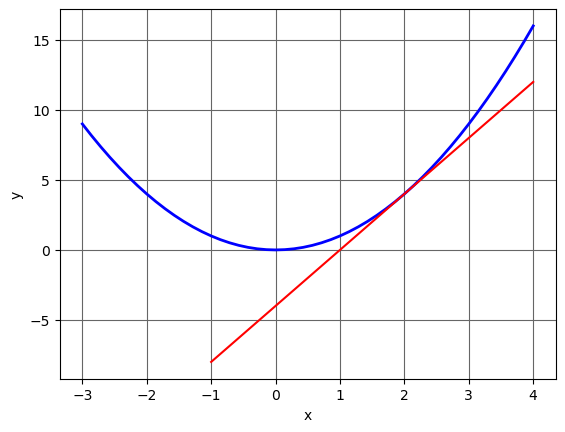

In [73]:
''' Графическая иллюстрация '''
import numpy as пр

''' График функции '''
x = np.linspace(-3,4,50)
y1 = x**2
plt.plot(x,y1,lw=2,c='b')

''' График касательной '''
x = np.linspace(-1,4,50)
y2 = 4*x - 4
plt.plot(x,y2,c='r')

plt.xlabel('х')
plt.ylabel('у')

''' Сетка '''
plt.grid(True, linestyle='-', color='0.4')

plt.show()

##### 2: Найти уравнение касательной и нормали к графику функции $ y = 6^{2}\sqrt{x}+2\sqrt{x}$ в точке с абсциссой $ x_{0} = 64$

In [78]:
x = symbols('x')
y = 6*x**(1/3) + 2*sqrt(x)

x0 = 64

''' y0 '''
y0 = y.subs(x,x0)

''' Касательная '''
l = tangent(y, 64)
l.equation()

-x/4 + y - 24

Нормаль - прямая, проходящая через точку касания перпендикулярно касательной.

In [84]:
''' Нормаль '''
p = Point(x0,y0)
l.perpendicular_line(p).equation()

-x - y/4 + 74

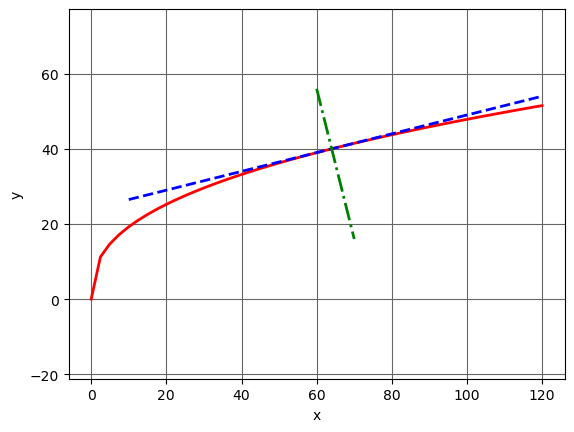

In [85]:
x = np.linspace(0,120,50)
y1 = 6*x**(1/3) + 2*x**(1/2)
plt.plot(x,y1,lw=2,c='r')
x = np.linspace(10,120,50)
y2 = x/4 + 24
plt.plot(x,y2,'--',lw=2,c='b')
x = np.linspace(60,70,50)
y3 = 296 - 4*x
plt.plot(x,y3,'-.',lw=2,c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.axis('equal')
plt.show()

##### 3: Из точки $A = (-4; 0)$ провести касательную к кривой $y=\sqrt{x}$

In [111]:
# Функции для раздела «Производная»: tangent_from_point()
def tangent_from_point(y, x1, y1):
    ''' у - уравнение кривой; (x1;y1yl) -
        точка, черев которую должна пройти
        касательная; (x0;y0) - точка касания '''
    x, x0, y0 = symbols('x x0 y0')
    
    ''' Производная y при x=x0 '''
    y_diff = diff(y, x).subs(x, x0)
    ''' Уравнение касательной '''
    
    y_tang = y_diff*(x-x0) + y0
    
    ''' Кривая у(х) проходит через точку касания (х1;у0) 1'''
    first_eq = y.subs(x, x0) - y0
    
    ''' Касательна проходит через точку (x1;y1) '''
    second_eq = y_tang.subs(x, x1) - y1
    
    ''' Решаем систему '''
    res = solve([first_eq, second_eq], [x0, y0], dict=True)
    if len(res) == 1: # одна касательная
        x01 = res[0][x0]
        y01 = res[0][y0]
        return Line((x01,y01), (x1,y1))
    
    else: # две касательных
        x021 = res[0][x0]; y021 = res[0][y0]
        x022 = res[1][x0]; y022 = res[1][y0]
        return Line((x021,y021), (x1, y1)), Line((x022,y022), (x1, y1))

In [112]:
x1, y1, x = symbols('x1, y1 x')
x1 = -4
y1 = 0

y = sqrt(x)

tangent_from_point(y,x1,y1).equation()

2*x - 8*y + 8

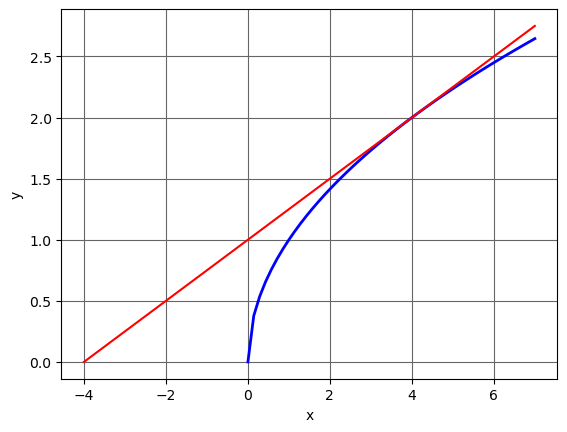

In [113]:
''' Графическая иллюстрация '''
x = np.linspace(0,7,50)
y1 = np.sqrt(x)
plt.plot(x,y1,lw=2,c='b')

x = np.linspace(-4,7,50)
y2 = x/4 + 1
plt.plot(x,y2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.grid (True, linestyle='-', color='0.4')
plt.show()

### Исследование функции

Для исследования характера поведения функции при помощи производных используются теоремы: </br>
1. В точке экстремума $у'(х) = 0$
2. Функция возрастает (убывает), если $у'(х) > 0 < 0.$
3. В точке перегиба $у"(х) = 0.$
4. Функция выпукла вниз (вверх), если $у"(х) > 0 < 0.$

Графическая иллюстрация приведенных свойств:


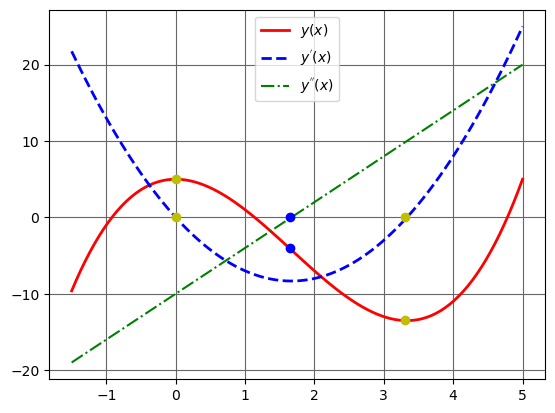

In [115]:
t = np.linspace(-1.5, 5, 100)
f = t**3 - 5*t**2 + 5
fd = 3*t**2 - 10*t
fdd = 6*t - 10
plt.plot(t,f,lw=2,color='red',label = "$y(x)$")
plt.plot(t,fd,'--',lw=2,color='b',label = "$y^{'}(x)$")
plt.plot(t,fdd, '-.', color='g',label = "$y^{''}(x)$")
plt.plot([0], [0], 'o', color='y')
plt.plot([0], [5], 'o', color='y')
plt.plot([3.3], [0], 'o', color='y')
plt.plot([3.3], [-13.4], 'o', color='y')
plt.plot([1.65], [0], 'o', color='b')
plt.plot([1.65], [-4], 'o', color='b')
plt.grid(True, linestyle='-', color='0.4')
plt.legend()
plt.show()

На графике:</br>
При $x \in (-\infty;0) $ и $x \in (3,3;0)$ функция $y(x)$ возрастает и производная $y'(x) > 0$ . </br>
$\quad$ В интервале (0;3,3) функция убывает, и $у'(х) < 0 .$</br>
$\quad$ В интервале $x \in (-\infty;1,65) $ функция выпукла вверх и $у"(х) < 0$; </br>
$\quad$ В интервале (1,65; оо) функция выпукла вниз, и $у"(х)>0$.</br>
$\quad$ В интервале $x \in (-\infty;1,65)$  функция $у'(х)$ убывает, и ее производная, функция $у"(х) > 0$ отрицательна.</br>
$\quad$ В интервале $(1,65;\infty)$ функция у'(х) возрастает, и функция у''(х) положительна.</br>

## Экстремум функции одной переменной

### Функция minimize()

Функция minimize - ищет минимум функции одним из итерационных методов, начиная с заданного начального значения.

scipy.optimize.minimize (fun, x0, args=(), method=None, jac=None, hess=None)</br>

Параметры:</br>
$\quad$ fun - функция (произвольного числа переменных $k$) fiin(x, *args), для которой разыскивается минимум;</br>
$\quad$ x0 - масив длины $k$, начальные значения для процесса итераций;</br>
$\quad$ args - параметры, необходимые для полного задания функции (в виде кортежа);</br>
$\quad$ method - метод поиска минимума;</br>
$\quad$ jac - метод для вычисления градиента, hess - метод для вычисления гессиана Возвращает: объект res; </br>
$\quad$ главные атрибуты: х - решение в виде массива;</br>
$\quad$ success - флаг, указывающий на успешное завершение поиска;</br>
$\quad$ message - сообщение, содержащее причину завершения поиска</br>

In [116]:
from scipy.optimize import minimize

### Функция solve()

Функция solve() - ищет корни уравнения или системы уравнений. Для поиска экстремума функции одной переменной основано на признаках экстремума.

#### Необходимый признак.

Для того, чтобы дифференцируемая функция $f(х)$ имела в точке $х_{0}$ экстремум, необходимо, чтобы в этой точке производная функции равнялась нулю: $f(x_{0}) = 0$. Точка, в которой производная обращается в нуль, называется критической (или стационарной).

#### Достаточный признак.

Если функция $f(х)$ дважды дифференцируема в некоторой точке $x_{0}$ и в этой точке $f'(х0) = 0$, a $f''(x_{0}) \neq 0$, то в точке $x_{0}$ функция достигает экстремума, причем максимума, если $f''(х_{0}) < 0$, и минимума, если $f''(x_{0}) > 0$.</br>
</br>
sympy.solve (f, symbols)</br>
</br>
Параметры: </br>
$\quad$ f- выражение, для которого ищется решение;</br>
$\quad$ symbols (не обязательный) - объект, относительно которого ищется решение.

In [119]:
from sympy import *

#### Пример

##### 1: Решить неравенство $x^{2}<3$

In [5]:
from sympy import *

x, у = symbols('x у')

solve(x**2 < 3)

(x < sqrt(3)) & (-sqrt(3) < x)

##### 2: Решить уравнение $х^{2} - у^{2} = 0$ относительно переменной $х$.

In [ ]:
from sympy import *

x, y = symbols(['x', 'y'])

solve(x**2 - у**2, x)

##### 3: Исследовать на экстремум функцию $y = e^{-x}-e^{-2x}$.


######
Решение в библиотеке scipy

In [9]:
f = lambda x: np.exp(-x) - np.exp(-2*x)

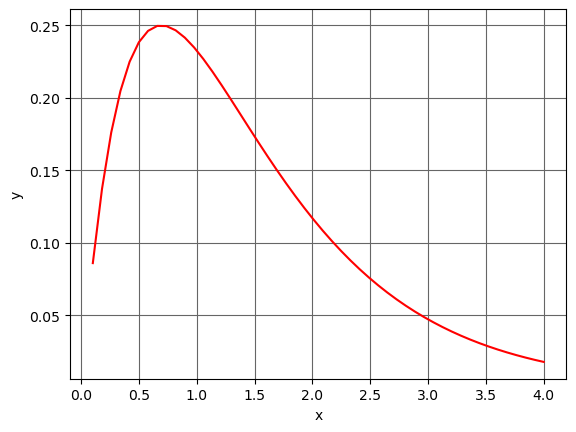

In [10]:
import numpy as np
import matplotlib.pyplot as plt

''' График '''
x = np.linspace(0.1,4,50)
plt.plot(x, f(x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [11]:
''' Максимум. В точке приблизительно: x = 0.5. Максимум функции f ищем как минимум функции -f '''
from scipy.optimize import minimize

f = lambda x: np.exp(-x) - np.exp(-2*x)
f_max = lambda x: -(np.exp(-x) - np.exp(-2*x))
res = minimize(f_max, -2)

print('x_max: %.3f f_max: %.3f' % (res.x, f(res.x)) )

x_max: 0.693 f_max: 0.250


In [ ]:
# Завершился ли поиск успешно?
res.success

In [91]:
# Полная информация
res

      fun: -0.24999999999945666
 hess_inv: array([[1.98553383]])
      jac: array([-7.26431608e-07])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([0.69314571])

######
Решение в библиотеке sympy

In [145]:
x = Symbol('x') # В книга нет строка кода, иначе вызывает исключение 
y = exp(-x) - exp(-2*x)

''' Находим критические точки. (Вычисляем
производные с помощью функции diff(),
Решаем систему, приравнивая
производные к нулю). '''

''' Функция solve возвращает решение
в виде списка. Для получения корня
берем значение списка с индексом 0. '''

x0 = solve(diff(y,x))[0]
print('x0: %.3f y(x0): %.3f' % (x0, y.subs(x, x0)))

x0: 0.693 y(x0): 0.250


In [146]:
x = Symbol('x')
y = exp(-x) - exp(-2*x)

''' Вторая производная
в критической точке: '''

diff(y,x,2).subs(x,x0)

-1/2

Вторая производная в критической точке отрицательна. Найден максимум.</br>
Ответ: $f_{max} = f(0,693) = 0,25$

##### 4: Исследовать на экстремум функцию  $y = x^{3}$.


In [149]:
x = Symbol('x') 
y = x**3
x0 = solve(diff(y,x))[0]

print('x0: %.3f y(x0): %.3f' % (x0, y.subs(x, x0)))

x0: 0.000 y(x0): 0.000


In [150]:
''' Вторая производная в критической точке: '''
diff(y,x,2).subs(x,x0)

0

Вторая производная в критической точке равна 0. Для выяснения характера критической точки используем признак: если в критической точке $f'(x_{0}) = f''(x_{0}) = 0$, а $ f'''(x_{0} \neq 0)$, то $x_{0}$ является точкой перегиба.

In [151]:
''' Третья производная в критической точке: '''
diff(y, x, 3).subs(x, x0)

6

$х = 0$ - точка перегиба.

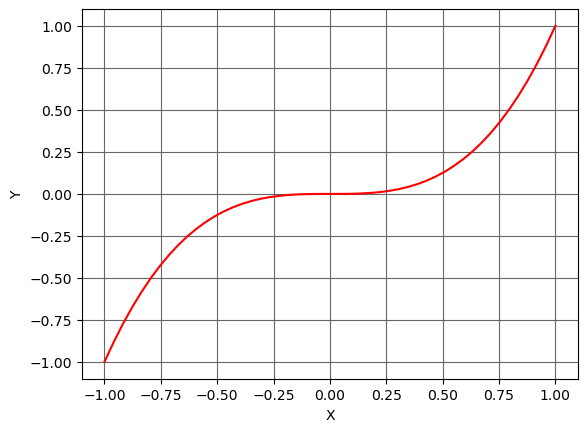

In [143]:
x = np.linspace(-1,1,50)
plt.plot(x, x**3, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

##### 5: Найти экстремум функции  $y = \frac{x^{3}+3x^{2}-1}{x^{2}+1}$.


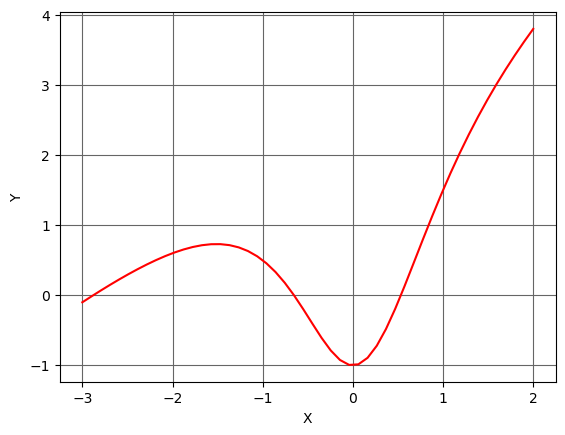

In [153]:
f = lambda x: (x**3+3*x**2-1) / (x**2+1)

x = np.linspace(-3,2,50)
plt.plot(x, f(x), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Ищем экстремумы, выбирая в качестве начальных точек значения: $х_{0} = -2$ и $x_{0} = 1$. Около точки $х0 = -2$, как показывает график, нужно искать точку максимума

In [156]:
''' 1. Минимум '''
res = minimize(f, 1)
print('x_min: %.3f fmin: %.3f' % (res.x, f(res.x)))

x_min: 0.000 fmin: -1.000


In [158]:
''' 2. Максимум функции f ищем как минимум функции -f '''
f_max = lambda х: -(х**3+3*х**2-1) / (х**2+1)
res = minimize(f_max, -2)
print('x_max: %.3f f max: %.3f' % (res.x, f(res.x)))

x_max: -1.513 f max: 0.731


Ответ:</br>
$x_{min}=0$;</br>
$x_{max}= -1.513$

## Наибольшее и наименьшее значения на отрезке

Наибольшее и наименьшее значения функции на заданном отрезке ищут по следующей схеме:
- внутри отрезка определяют критические точки и вычисляют в них значения функции;
- находят значения функции на концах отрезка;
- среди всех найденных значений находят максимальное и минимальное.

#### Пример

##### 1: Найти наибольшее и наименьшее значения функции $f(х)$ на отрезке
$f(x)=^{3}\sqrt{2(x+1)^{2}(5-x)}-2; x \in [-3;3]$

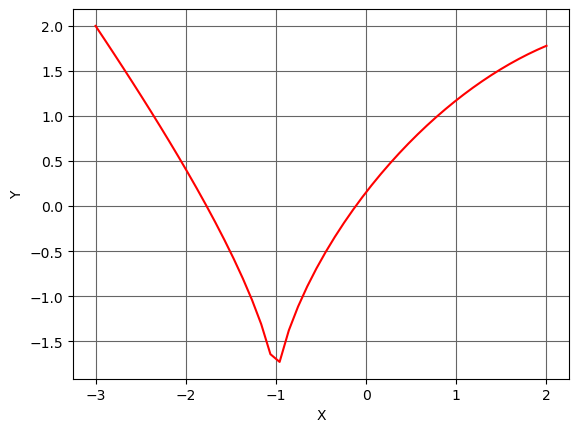

In [160]:
''' График функции на заданном отрезке '''
fun = lambda x: np.cbrt(2*(x+1)**2*(5-x)) - 2
х = np.linspace(-3, 3, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, fun(x), 'r')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Внутри отрезка $[-3;3]$ единственный экстремум (минимум). Находим его

In [163]:
# 1.
res = minimize(fun, -1.5)
print('x_min: %.3f' % res.x)

x_min: -0.490


Это явно неверное решение. В точке $x = - 1$ функция имеет бесконечную производную и сходимость решений очень медленная. 
Возьмем начальное значение, близкое к предполагаемому значению

In [165]:
res = minimize(fun, -1.001)
print('xmin: %.3f' % res.x)

xmin: -1.001


Предполагая, что точное решение: $х = -1$, возьмем его в качестве начального значения.

In [168]:
res = minimize(fun, -1.0)
print('x_min: %.3f' % res.x)

x_min: -1.000


In [172]:
''' 1. Значение функции в точке минимума: '''
fun(res.x)

array([-2.])

In [173]:
''' 2. Значения функции на концах отрезка : '''
print('у(-З): %.3f у(3): %.3f' % (fun(-3), fun(3)))

у(-З): 2.000 у(3): 2.000


Ответ:</br> 
наименьшее значение:$-2$, </br> 
наибольшее значение: $2$.

##### 2: Найти точки перегиба и исследовать характер выпуклости кривой $y = x^{4}(12\ln x - 7)$

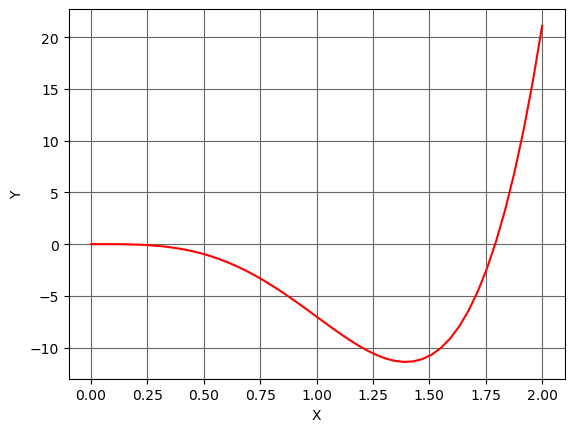

In [175]:
f = lambda х: х**4 * (12*np.log(x) - 7)
x = np.linspace(0.001,2,50)
plt.plot(x, f(x), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [178]:
x = symbols('x')
y = x**4 * (12*log(x) - 7)

''' Вычисляем вторую производную '''
y_2deriv = diff(y,x,2)
y_2deriv

144*x**2*log(x)

In [180]:
''' Находим корни второй производной '''
x_inflex = solve(y_2deriv, x)
x_inflex

[0, 1]

$x = 0$ находится на границе области определения функции. </br>
Точка перегиба: $х = 1.$ Это можно заключить и из графика. Но можно и
проверить, что третья производная отлична от нуля.

In [182]:
diff(y,x,3).subs(x, 1)

144

Характер выпуклости определяем по графику, или используем признак: если вторая производная отрицательна во всех точках интервала, то в этом интервале функция выпукла вверх; если положительна - выпукла вниз.

In [184]:
print('слева: %.1f справа: %.1f' % (y_2deriv.subs(x,0.9), y_2deriv.subs(x,1.1)))

слева: -12.3 справа: 16.6


На интервале $(0;1) $ - выпукла вверх, на интервале $(1;\infty)$ - выпукла вниз

##### 3: Провести полное исследование функции $ y = \frac{x^{2}-16}{5(x+5)}$

Для решения используем библиотеку sympy.

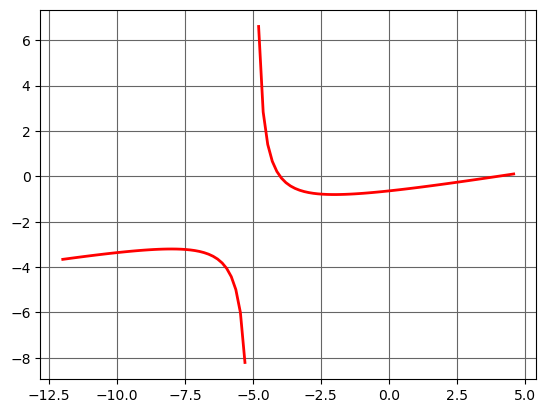

In [189]:
from sympy import *

x = symbols('x')
y = (x**2-16)/(5*(x+5))

''' Предварительный график. Строим с учетом того, что х=-5 не входит в область определения '''
f = lambda x: (x**2-16)/(5*(x+5))
x = np.linspace(-12,4.6,100)
x[(x>-5.2) & (x < -4.8)] = np.nan
y = f(x)
plt.plot(x,y,lw=2,color='red')

plt.grid(True, linestyle='-', color='0.4')
plt.show()

1. Область определения: х Ф - 5.
2. Пересечение с осями

In [214]:
x = symbols('x')
y = (x**2-16)/(5*(x+5))

''' Ось Oy: '''
y.subs(x,0)

-16/25

In [215]:
x = symbols('x')
y = (x**2-16)/(5*(x+5))

''' Ось Ох: '''
solve(y, x)

[-4, 4]

3. Асимптоты.

In [216]:
limit(y, x, -5)

oo

За. Вертикальные (вида $х = х_{0}$). В область определения не входит значение $х = -5$. Предел при $х \to 5$:

In [223]:
limit(y, x, -5)

oo

Предел бесконечный, следовательно, $х = -5$ - вертикальная асимптота.

In [225]:
''' 3b. Горизонтальные (вида у = у0). '''
limit(y, x, oo)

oo

Предел при $х \to \infty$ бесконечный, следовательно, горизонтальной асимптоты нет.

In [229]:
''' Зс. Наклонные (вида у = kx+b)'''
k = limit(y/x, x, oo)
k

1/5

Коэффициент $k$ - не конечный, следовательно, наклонной асимптоты нет.

## Частные производные

### Функция diff(f, x, k, у, m,...)

Параметры:</br>
    f - функция от переменных х, у, ...; </br>
    k, т, ... - порядок производной по соответствующей переменной.

#### Пример

##### 1: Вычислить частные производные $\frac{d^{2}z}{dx^{2}}$ и $\frac{d^{2}z}{dy^{2}}$ функции $ z = xy^{2} + e ^{-x} $

In [5]:
from sympy import *

x, y = symbols('x y')
z = x*y**2 + exp(-x)
z

x*y**2 + exp(-x)

In [6]:
diff(z, x, 2)

exp(-x)

In [7]:
diff(z, y, 2)

2*x

##### 2: Вычислить частную производную $ \frac{d^{3}z}{dx^{2}dy} $ функции $z = \sin x · \cos y$

In [9]:
x, y = symbols('х у')
z = sin(x)*cos(y)

diff(z, x, 2, y)

sin(у)*sin(х)

## Градиент

**Градиентом функции** называется вектор, составленный из частных производных этой функции.

Для функции двух переменных градиент вычисляется по правилу:</br></br>
<div style="text-align: center;"> <font size=4> $ \mathrm{grad} f=\frac{df}{dx}i+\frac{df}{dy}j$.</font></div>

#### Пример

##### 1: Вычислить градиент функции $ z = 5\ln(x^{2}+y^{2})$ в точке $М(1;2)$.

In [11]:
x,y = symbols('x y')
z = 5*log(x**2 + y**2)
z_x = diff(z,x).subs({x:1, y:2})
z_y = diff(z,y).subs({x:1, y:2})
grad_f = (z_x, z_y)
grad_f

(2, 4)

##### 2: Определить направление I быстрейшего возрастания функции $z = x^2 + xy + 7$ в точке $М(1; —1)$.

Решение. Направление быстрейшего возрастания функции в точке М определяется градиентом функции, вычисленным в этой точке.

In [17]:
x, y = symbols('x y')
z = x**2 + x*y +7
z_x = diff(z,x).subs({x:1, y:-1})
z_y = diff(z,y).subs({x:1, y:-1})
grad_f = (z_x, z_y)
grad_f

(1, 1)

Градиентом является вектор $i + j$, следовательно, искомое направление $l$ составляет угол $45^{о}$ с осью $Ox$.

## Производная по направлению

**Производная функции** $ z = f(x,y) $ в данном направлении $ l = (l_{х}; l_{у})$ вычисляется по формуле:</br></br>
<div style="text-align: center;"> <font size=4> $ \frac{dz}{dl} = \frac{dz}{dx}\cos a + \frac{dz}{dy}\cos\beta$.</font></div></br></br>
где $\cos a = \frac{l_{x}}{|l|}$, $\cos\beta\frac{l_{y}}{|l|}$ - направляющие косинусы вектора $l$, и $|l|=\sqrt{l^{2}_{x}+l_{y}^{2}}$

#### Пример

##### 1: Найти производную функции $z = х^{2} + у^{2}$ в точке $М(1; 1)$ по направлению вектора $l=3i+4i$

In [18]:
''' 1 = (3,4) '''
l = Point(3,4)

''' Модуль вектора - расстояние от конечной точки вектора до начала координат '''
l_n = l.distance(Point(0,0))

''' Направляющие косинусы '''
cos_a = l.x/l_n
cos_b = l.y/l_n
x,y = symbols('х у')
z = x**2 + y**2

''' Частные производные а точке М Подставляем значения обеих переменных '''
z_x = diff(z,x).subs({x:1, y:1})
z_y = diff(z,y).subs({x:1, y:1})

''' Производная по направлению '''
z_l = z_x*cos_a + z_y*cos_b
z_l

14/5

## Касательная плоскость

**Касательной плоскостью** к поверхности в точке $M_{0}$ называется плоскость, содержащая касательные ко всем кривым, которые принадлежат данной поверхности и проходят через точку $M_{0}$.</br>

**Нормалью** к поверхности в точке $M_{0}$ называется прямая, проходящая через данную точку перпендикулярно касательной плоскости. Если поверхность задана неявным уравнением $ F(x,y,z) = 0 $, то уравнение касательной плоскости к поверхности в точке $М_{0}(х_{0};у_{0};z_{0})$ находится по формуле:</br>
<div style="text-align: center;"> <font size=4> $ F'(M_{0})·(x-x_{0})+F'_{y}(M_{0})·(y-y_{0}+F'_{z}(M_{0})·(z-z_{0})=0$.</font></div>

> Производные $F'_{x}$, $F'_{y}$, $F'_{z}$ - не являются производными неявной функции, а вычисляются по правилам дифференцирования функции трех переменных (при взятии производной по переменной х, остальные две переменные рассматриваются как константы).

Уравнение нормали можно записать в виде канонического уравнения прямой:</br></br>
<div style="text-align: center;"> <font size=4> $ \frac{x-x_{0}}{F'_{x}(M_{0})} = \frac{y-y_{0}}{F'_{y}(M_{0})} = \frac{z-z_{0}}{F'_{z}(M_{0})} $.</font></div></br>
или в параметрическом виде:</br></br>
<div style="text-align: center;"> <font size=4> $ x=x_{0}+F'_{x}(M_{0})·t, y=y_{0}+F'_{y}(M_{0}·t), z=z_{0}+F'_{z}(M_{0}·t), t\in\mathbb{R} $.</font></div></br>

#### Пример

##### 1: Провести касательную плоскость и нормаль к сфере $x^{2}+y^{2}+z^{2} = 3$ в точке $М(1;1;1)$.


In [35]:
# Функции для раздела «Производная»: tangent_plane()
def tangent_plane(F,M):
    ''' Находит уравнение касательной плоскости
    и нормали к поверхности F(x,y,z) в точке M '''
    
    ''' Частные производные в точке М '''
    F_diff_x = diff(F,x).subs({x:M.x, y:M.y, z:M.z})
    F_diff_y = diff(F,y).subs({x:M.x, y:M.y, z:M.z})
    F_diff_z = diff(F,z).subs({x:M.x, y:M.y, z:M.z})
    
    ''' Нормальный вектор плоскости '''
    n = Point(F_diff_x, F_diff_y, F_diff_z)
    
    ''' Касательная плоскость проходит через точку M с нормальным вектором n '''
    p = Plane(M, normal_vector=n).equation()
    
    ''' Нормаль проходит через точку M и точку K = M + n '''
    K = Point(M.x+n.x, M.y+n.y, M.z+n.z)
    l_n = Line(M, K).arbitrary_point()
    
    return p, l_n

In [ ]:
x, y, z = symbols('x у z')

''' Уравнение сферы '''
F = x**2 + y**2 + z**2 - 9
M = Point(1,1,1)

p, l_n = tangent_plane(F,M)

In [91]:
''' Касательная плоскость '''
p

2*x + 2*y + 2*z - 6

In [88]:
''' Нормаль '''
l_n

Point3D(2*t + 1, 2*t + 1, 2*t + 1)

## Экстремум функции многих переменных

Для поиска экстремума функции многих переменных используется функция minimize() модуля scipy.optimize или библиотека sympy.

### Решение в библиотеке scipym

#### Пример

##### 1: В качестве первого примера возьмем функцию с очевидным ответом. Найти минимум функции двух переменных $z=(x-1)^{2}+(y-3)^{4}$

In [4]:
from scipy.optimize import minimize

''' z - функция от вектора w; х = w[0], у = w[l] '''
z = lambda w: (w[0]-1)**2 + (w[1]-3)**4

''' Ищем минимум, начиная с точки (0;0) '''
res = minimize(z, (0, 0))

''' Полученная точка минимума находится по атрибуту .х '''
res.x

array([0.99999999, 2.98725136])

Предполагая, что точное решение: $х = 1$, $у = 3$, повторим поиск, выбирая начальные значения, близкие к предполагаемому решению

In [104]:
res = minimize(z, (9.999, 3.001))
res.x

array([1.00000001, 3.001     ])

In [105]:
z((1,3)) < z((0.999, 3.001))

True

In [106]:
''' Значение функции в точке минимума: '''
z((1,3))

0

##### 2:Исследовать функцию на экстремум: $ z = x^{4} + y^{4} - 2 x^{2} + 4xy - 2 y^{2} $

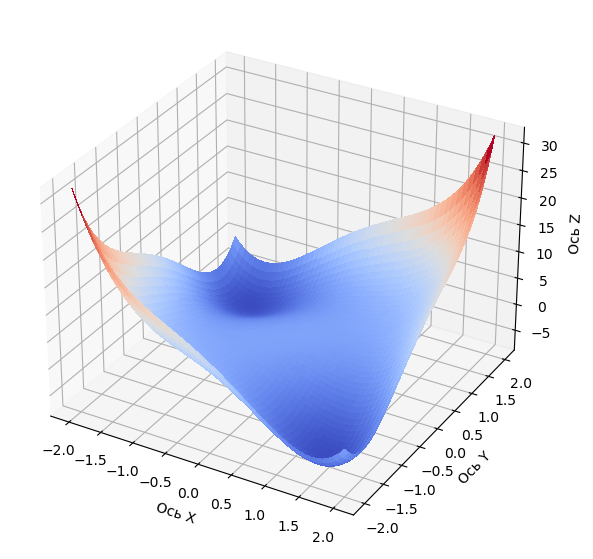

In [12]:
import numpy as np
import matplotlib.pyplot as plt

''' Строим трехмерный график с использованием
    функции Axes3D() модуля mpl_toolkits.mplot3d '''
from mpl_toolkits.mplot3d import Axes3D


''' Функция z(x,y) (х = w[0], у = w[1]) '''
z = lambda w: w[0]**4 + w[1]**4 - 2*w[0]**2 +4*w[0]*w[1] - 2*w[1]**2

fig = plt.figure(figsize=(7,7))
axes = fig.add_subplot(projection='3d')

y = x = np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)
Z = z((x,y))

surf = axes.plot_surface(x, y, Z, cmap='coolwarm',linewidth=0, antialiased=False)

axes.set_xlabel('Ось X')
axes.set_ylabel('Ось Y')
axes.set_zlabel('Ось Z')

plt.show()

Поиск экстремума с использованием функции minimize() библиотеки scipy.</br>
Из графика заключаем: функция имеет два локальных минимума в точках, приблизительно, $(1;-1)$ и $(-1;1)$. Точка, ориентировочно, (0; 0) является седловой точкой.</br>

In [20]:
''' 1 точка '''
res = minimize(z, (1, -1))
res.x

array([ 1.41421356, -1.41421356])

In [21]:
''' Значение функции в точке минимума: '''
z(res.x)

-8.0

In [22]:
''' 2 точка '''
res = minimize(z, (-1, 1))
res.x

array([-1.41421358,  1.41421356])

In [24]:
''' Значение функции: '''
z(res.x)

-7.999999999999997

###  Поиск экстремума с использованием функции solve() библиотеки sympy

> Для поиска экстремума с использованием библиотеки sympy применяем признаки экстремума функции двух переменных.

#### Необходимый признак. 


Для того, чтобы дифференцируемая функция $f(x, y)$ имела экстремум в точке $(х_{0};у_{0})$, необходимо, чтобы в этой точке обращались в нуль частные производные: $ f'_{x}(x_{0}, y_{0}) = 0 $, $ f'_{y}(x_{0}, y_{0}) = 0 $

#### Достаточный признак.


Обозначим $ A = f''_{xx}, B = f''_{xy}, C = f''_{yy}, \Delta=AC-B^{2} $

#### Функция suff_indic()


Пример, исследовать на экстремум функцию $x = x^{4} + y^{4} - 2^{2} + 4xy - 2y ^{2}$

#####
1. Находим критические точки, используя функцию ctitical_points():

In [33]:
# Функции «Производная»: ctitical_points_conditional()
def critical_points(z):
    ''' Нахождение критических точек
    функции двух переменных z
    и величин А и Delta '''
    ''' Производные 1-го порядка '''
    z_x = diff(z,x)
    z_y = diff(z,y)
    
    ''' Ищем критические точки,
    приравнивая производные к нулю '''
    cr_point = solve([z_x, z_y], [x, y], dict=True)
    
    ''' Производные 2-го порядка '''
    A = diff(z,x,2)
    B = diff(z,x,y)
    C = diff(z,y,2)
    
    ''' Delta '''
    D = A*C - B**2
    
    return cr_point, A, D

In [36]:
from sympy import *

x, y = symbols('x y')
z = x**4 + y**4 - 2*x**2 + 4*x*y - 2*y**2
cr_point, A, D = critical_points(z)
cr_point

[{x: 0, y: 0},
 {x: -sqrt(2), y: sqrt(2)},
 {x: sqrt(2), y: -sqrt(2)},
 {x: -sqrt(3)/2 - I/2, y: -sqrt(3)/2 + I/2},
 {x: -sqrt(3)/2 + I/2, y: -sqrt(3)/2 - I/2},
 {x: sqrt(3)/2 - I/2, y: sqrt(3)/2 + I/2},
 {x: sqrt(3)/2 + I/2, y: sqrt(3)/2 - I/2}]

Три критические точки. Их значения возвращаются в виде кортежа словарей.

#####
2. Для каждой критической точки проверяем достаточный признак экстремума, используя функцию suff_indic():

In [38]:
# Функции «Производная»: suff_indic()
def suff_indic(A, D, cr_point):
    ''' А и D - функции двух переменных, cr_point - словарь '''
    A0 = A.subs(cr_point)
    D0 = D.subs(cr_point)
    return D0, A0

In [40]:
''' 1-я точка '''
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(0, -4)

In [42]:
''' 2-я точка '''
D0, А0 = suff_indic(A, D, cr_point[1] )
D0, A0

(384, -4)

In [44]:
''' 3-я точка '''
D0, A0 = suff_indic(A, D, cr_point[2])
D0, A0

(384, 20)

Вторая и третья точка являются точками минимума ($\Delta = 384 > 0, A=20>0$). Значения функции в этих точках:

In [49]:
z.subs(cr_point[1]) # В книги пишут z.subs(cr_p[1]) - не найден cr_p

-8

In [50]:
z.subs(cr_point[2]) # В книги пишут z.subs(cr_p[2]) - не найден cr_p

-8

В точке $(0;0)$ значение $\Delta = 0$. По графику функции можно заключить, что это седловая точка. Проверим это аналитически, вычислив значения функции в близких к началу координат точках.

In [52]:
z = lambda w: w[0]**4 + w[1]**4 - 2*w[0]**2 + 4*w[0]*w[1] - 2*w[1]**2
''' Значение функции в самой точке '''
z((0,0))

0

In [54]:
''' Сдвинемся по оси Ох '''
''' Функция S() переводит аргумент
в символьное значение, а метод .n(k)
позволяет вывести на печать
ограниченное число знаков '''

S(z((0.1,0))).n(4)

-0.01990

In [58]:
''' Сдвинемся вдоль прямой у=х '''
S(z((0.1,0.1))).n(5)

0.00020000

Получены значения, и меньшие, и большие, чем значение в исследуемой точке, следовательно, она не является точкой экстремума.

Ответ: $Z_{min} = z\left(\sqrt{2}, -\sqrt{2}\right) = z\left(-\sqrt{2}, \sqrt{2}\right)=-8$

###  Условный экстремум

#### 1. Поиск экстремума с использованием функции minimize() библиотеки scipy

In [5]:
from scipy.optimize import minimize

#####
#### Пример

######
##### 1: Найти экстремумы функции $z = х - у + 2$ при ограничении: $х^{2} + у^{2} = 1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

''' График функций f и g '''
from mpl_toolkits.mplot3d import Axes3D

f = lambda w: w[0] - w[1] + 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
                     
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

x, y = np.meshgrid(x, y)
z1 = f((x,y))
ax.plot_surface(x, y, z1, alpha=0.4)

''' Цилиндр х^2+у^2=1 '''
x = np.linspace(-1, 1, 100)
z = np.linspace(0, 3, 100)
xc, zc = np.meshgrid(x, z)
yc = np.sqrt(1-xc**2)
ax.plot_surface(xc, yc, zc, alpha=0.3)
ax.plot_surface(xc, -yc, zc, alpha=0.3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [6]:
from scipy.optimize import minimize

''' Словарь, задающий формулы и тип ограничений  '''
cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})

''' Границы в виде: все переменные могут принимать произвольные значения '''
bnds = ((None, None), (None, None))

''' Ищем точку минимума '''
res = minimize(f, (-0.5, 0.5), bounds=bnds, constraints=cons)

res.x

array([-0.7071068 ,  0.70710677])

In [7]:
''' Ищем точку максимума (как точку минимума функции -f) '''
f_max = lambda w: -(1.5*w[0] - w[1] + 1)

cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})
bnds = ((None, None), (None, None))

res = minimize(f_max, (0.5, -0.5), bounds=bnds,constraints=cons)

res.x

array([ 0.83205051, -0.55469991])

#### 2. Поиск экстремума с использованием функции solve () библиотеки sympy.

#####
#### Пример:

######
##### 1:  найти экстремумы функции $z = х - у + 2$ при ограничении:  $х^{2} - у^{2} = 1$.

In [11]:
# Функции «Производная»: critical_points_conditional()
def critical_points_conditional(f, g):
    ''' Нахождение критических точек
    функции Лагранжа L
    и определителя Delta
    f - целевая функция, g - условие '''
    
    ''' Функция Лагранжа '''
    lam = symbols('lam')
    L = f + lam*g
    
    ''' Производные 1-го порядка '''
    gradL = [diff(L,c) for c in [x,y]]
    
    ''' Производная no lam совпадает eg '''
    ''' Набор производных '''
    eqs = gradL + [g]
    
    ''' Ищем критические точки, приравнивая производные к нулю '''
    cr_point = solve(eqs, [x, y, lam], dict=True)
    
    ''' Производные функции g '''
    g_x = diff(g,x)
    g_y = diff(g,y)
    
    ''' Производные 2-го порядка '''
    L_xx = diff(L,x,2)
    L_xy = diff(L,x,y)
    L_yy = diff(L,y,2)
    
    ''' Определитель D '''
    M = Matrix([[0,g_x,g_y], [g_x,L_xx, L_xy], [g_y,L_xy,L_yy]])
    D = -det(M)
    
    return cr_point, D

In [15]:
from sympy import *

x, y, lam = symbols('x y lam')
''' Целевая функция '''
f = 1.5*x - y + 1

''' Условие '''
g = x**2 + y**2 - 1

cr_point, D = critical_points_conditional(f,g)
cr_point

[{x: 0.832050294337844, y: -0.554700196225229, lam: -0.901387818865997},
 {x: -0.832050294337844, y: 0.554700196225229, lam: 0.901387818865997}]

Две критические точки. Найдем значения определителя Д в этих точках:

In [18]:
''' Значения определителя D в критических точках '''
[D.subs(p) for p in cr_point]

[-7.21110255092798, 7.21110255092798]

В первой точке - максимум $(\Delta < 0)$, во второй - минимум $(\Delta > 0)$.

Значения функции в точках экстремума:

In [20]:
''' Значения функции f '''
[f.subs(p) for p in cr_point]

[2.80277563773199, -0.802775637731995]

Ответ:</br>
zmin = $z_{min}(-0,832; 0,555) = -0,803$;</br>
zmax = $z(0,832;-0,555) = 2,803$</br>

###  Применения производной в экономике

1. Пусть $С = C(Q)$ - себестоимость продукции в зависимости от объема произведенной продукции $Q$. Предельная себестоимость $МС$ (себестоимость прироста продукции) вычисляется по формуле:$ MC = C'(Q)$.

2. Пусть $D = D(P)$ - функция спроса в зависимости от цены товара $Р$. Эластичность спроса (относительное изменение спроса при
изменении цены товара на один процент) вычисляется по формуле</br></br>
</br>
<div style="text-align: center;"> <font size=4> $ E(D) = P · \frac{D'(p)}{D(P)} $.</font></div></br>
</br>
Эластичность предложения (относительное изменение предложения при изменении цены товара на один процент) вычисляется по
формуле</br>
</br>
<div style="text-align: center;"> <font size=4> $ E(S) = P · \frac{S'(p)}{S(P)} $.</font></div></br>
</br>
Эластичность себестоимости (относительное изменение себестоимости при изменении объема выпускаемой продукции на один
процент) вычисляется по формуле</br>
<div style="text-align: center;"> <font size=4> $ E(C) = P · \frac{C'(p)}{C(P)} $.</font></div></br>
</br>
Если $E(D)| > 1$ то спрос считается эластичным;</br>
если $E(D)| = 1$ то спрос нейтрален;</br>
если $E(D)| < 1$ то спрос неэластичен</br>
</br>
Закон убывающей эффективности производства утверждает, что при увеличении одного из основных факторов производства, например, капитальных затрат $К$, прирост производства начиная с некоторого значения $K_{0}$ является убывающей функцией. Точка $K_{0}$ характеризуется тем, что график функции $V(K)$, описывающей зависимость объема продукции $V$ от $K$ меняет выпуклость вниз на выпуклость вверх. Это означает, что точка $K_{0}$ является точкой перегиба графика функции.

### Пример:

#### 1: Определить коэффициенты эластичности производственной функции Кобба-Дугласа $z = 4.5x^{0.33}y^{0.66}$

In [21]:
x,y = symbols('x y')

''' Частные производные: '''
z = 4.5*x**(0.33) * y**(0.66)
z_x = diff(z, x)
z_y = diff(z, y)

''' Коэффициенты эластичности '''
E_x = (x/z)*z_x
E_y = (y/z)*z_y

print('E_x: %.2f E_y: %.2f' % (E_x, E_y))

E_x: 0.33 E_y: 0.66


#### 2: Зависимость объема выпуска продукции $V$ от капитальных затрат К определяется функцией $V = V_{0}\ln(5 + К^{2})$. Найти интервал изменения $К$, на котором увеличение капитальных затрат неэффективно.

Решение. </br>
Найдем точку перегиба функции $V(K)$. Достаточный признак точки перегиба: вторая производная функции в этой точке обращается в ноль, а третья производная отлична от нуля.

In [24]:
from sympy import *

K,V0 = symbols('K V0')
V = V0*log(5+K**2)

''' Вторая производная '''
Vprim2 = diff(V,K,2)

''' Третья производная '''
Vprim3 = diff(V,K,3)

''' Корни второй производной  '''
s = solve(Vprim2,K)
s

[-sqrt(5), sqrt(5)]

Подходит положительный корень $K_{0} = s[1] = \sqrt{5}$.</br>
Значение третьей производной в этой точке:

In [27]:
Vprim3.subs(K,s[1])

-sqrt(5)*V0/25

Ответ: Увеличение капитальных затрат неэффективно при значениях $ K > \sqrt{5}$